# Multilabel Classification Example: 
## <u>Multinomial targets </u>

### Task:
**1. Refresher questions for Pandas and Matplotlib:**
- Read Wine Data dataset by calling sklearn.datasets import load_wine.
- Plot a bar chart for target wine classes.
- Calculate means of all numeric variables for each wine class. Are mean values very different among wine classes for some numeric variables?

**2. Build a decision tree classifier for Wine Data and calculate the accuracy score.**

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine

In [2]:
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
Data, target = wine.data, wine.target

In [4]:
print(Data.shape)
print(target.shape)

(178, 13)
(178,)


#### Plot a bar chart for target wine classes.

In [5]:
import matplotlib.pyplot as plt
# %matplotlib
# %config InlineBackend.figure_format = 'retina'
# plt.style.use("ggplot")

In [8]:
wine_type = ['class0','class1','class2']
target_counts = np.unique(target, return_counts=True)
target_counts

(array([0, 1, 2]), array([59, 71, 48], dtype=int64))

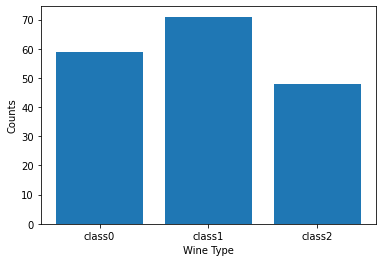

In [7]:
plt.bar(wine_type, target_counts[1])
# plt.bar(target_counts[0],target_counts[1])
plt.xlabel('Wine Type')
plt.ylabel('Counts')
plt.show()

#### Calculate means of all numeric variables for each wine class. Are mean values very different among wine classes for some numeric variables?

In [10]:
all_data = pd.DataFrame(wine.data)
all_data['target'] = target
pd.pivot_table(all_data,index='target',aggfunc=np.mean)

,0,1,2,3,4,5,6,7,8,9,10,11,12
target,,,,,,,,,,,,,
0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
1,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
2,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


We don't see much difference in numeric variable for different classes, however we can notice a slightly difference among different wine_class in column 12.

### 2. Build a decision tree classifier for Wine Data and calculate the accuracy score.

In [58]:
from sklearn.model_selection import train_test_split

D_train, D_test, t_train, t_test = \
train_test_split(Data, target, test_size=0.3, stratify=target)

In [65]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=9)

In [66]:
dt.fit(D_train,t_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=9)

In [67]:
dt.score(X=D_test,y=t_test)

0.9629629629629629

We tried changing different random_state values and we got best score in 96% at value 9.